In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

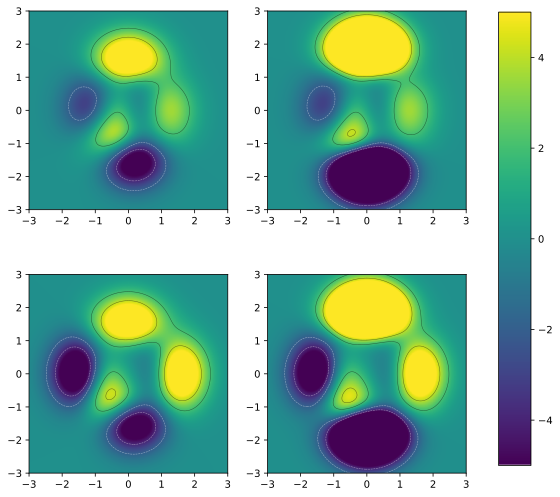

In [65]:
# the "peaks" function
def peaks(x,y,args=[3,5]):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**args[0] - y**args[1]) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
  return z


# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

fig, ax = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)
fig.subplots_adjust(right=0.8, wspace=.2, hspace=.12)  # Adjust pad, w_pad, h_pad as needed  # Make room for the colorbar

images = []
for i, r in enumerate([3, 5]):
    for j, c in enumerate([5, 7]):
        Z = peaks(x, y, args=[r, c])
        im = ax[i, j].imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
        images.append(im), 4.0
        ax[i, j].contour(x, y, Z, [-4.0], colors = ['white'], alpha=0.5, linewidths=0.5)
        ax[i, j].contour(x, y, Z, [-2.0], colors = ['white'], alpha=0.5, linewidths=0.5)
        ax[i, j].contour(x, y, Z, [2.0], colors = ['black'], alpha=0.5, linewidths=0.5)
        ax[i, j].contour(x, y, Z, [4.0], colors = ['black'], alpha=0.5, linewidths=0.5)
        

# Create colorbar
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # [left, bottom, width, height]
fig.colorbar(images[0], cax=cbar_ax)
plt.show()

In [44]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

[-1.34739624436821 0.204518866097005]
[-1.40743162  1.65566949]


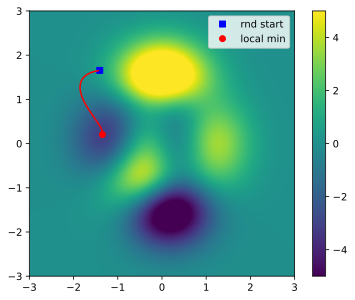

In [10]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()